In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
demDetail = pd.read_csv("demographic_detail.csv")

In [4]:
demDetail.head()

,subject_id,hadm_id,marital_status_itemid,marital_status_descr,ethnicity_itemid,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr
0,56,28766,NaN,NaN,200083,WHITE,200053,MEDICARE-PRIVATE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
1,37,18052,200050.0,MARRIED,200083,WHITE,200053,MEDICARE-PRIVATE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
2,78,15161,200071.0,SEPARATED,200018,BLACK/AFRICAN AMERICAN,200052,MEDICARE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
3,67,35878,200072.0,SINGLE,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
4,3,2075,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT


In [5]:
demDetail["subject_id"].duplicated().sum()

1122

In [6]:
demDetail.shape

(5074, 14)

In [7]:
base = pd.read_csv("selected_ids.csv")

In [8]:
base.shape

(3923, 6)

In [9]:
base.head(1)

,subject_id,hadm_id,admit_dt,sex,dob,age_at_adm
0,3,2075,2682-09-07,M,2606-02-28,76.0


In [10]:
df = base.merge(demDetail, on = "hadm_id", how = "left")
df

,subject_id_x,hadm_id,admit_dt,sex,dob,age_at_adm,subject_id_y,marital_status_itemid,marital_status_descr,ethnicity_itemid,ethnicity_descr,overall_payor_group_itemid,overall_payor_group_descr,religion_itemid,religion_descr,admission_type_itemid,admission_type_descr,admission_source_itemid,admission_source_descr
0,3,2075,2682-09-07,M,2606-02-28,76.0,3,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
1,12,12532,2875-09-26,M,2803-05-14,72.0,12,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200027,ELECTIVE,200065,PHYS REFERRAL/NORMAL DELI
2,21,20666,3138-10-29,M,3051-05-22,87.0,21,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200047.0,JEWISH,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
3,26,15067,3079-03-03,M,3007-03-02,72.0,26,200072.0,SINGLE,200080,UNKNOWN/NOT SPECIFIED,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
4,31,15325,2678-08-21,M,2606-05-17,72.0,31,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3918,32686,30102,2612-05-27,M,2543-12-06,68.0,32686,200050.0,MARRIED,200083,WHITE,200067,PRIVATE,200081.0,UNOBTAINABLE,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
3919,32705,33462,3337-04-06,F,3257-03-05,80.0,32705,200088.0,WIDOWED,200083,WHITE,200067,PRIVATE,200068.0,PROTESTANT QUAKER,200028,EMERGENCY,200074,TRANSFER FROM HOSP/EXTRAM
3920,32706,35651,2676-03-20,M,2595-02-14,81.0,32706,200088.0,WIDOWED,200083,WHITE,200052,MEDICARE,200023.0,CATHOLIC,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT
3921,32711,36069,3143-05-20,F,3057-12-21,85.0,32711,200050.0,MARRIED,200083,WHITE,200052,MEDICARE,200060.0,NOT SPECIFIED,200028,EMERGENCY,200029,EMERGENCY ROOM ADMIT


In [11]:
df.shape

(3923, 19)

In [12]:
df.isnull().sum()

subject_id_x                    0
hadm_id                         0
admit_dt                        0
sex                            13
dob                             0
age_at_adm                      0
subject_id_y                    0
marital_status_itemid         328
marital_status_descr          328
ethnicity_itemid                0
ethnicity_descr                 0
overall_payor_group_itemid      0
overall_payor_group_descr       0
religion_itemid               104
religion_descr                104
admission_type_itemid           0
admission_type_descr            0
admission_source_itemid         0
admission_source_descr          0
dtype: int64

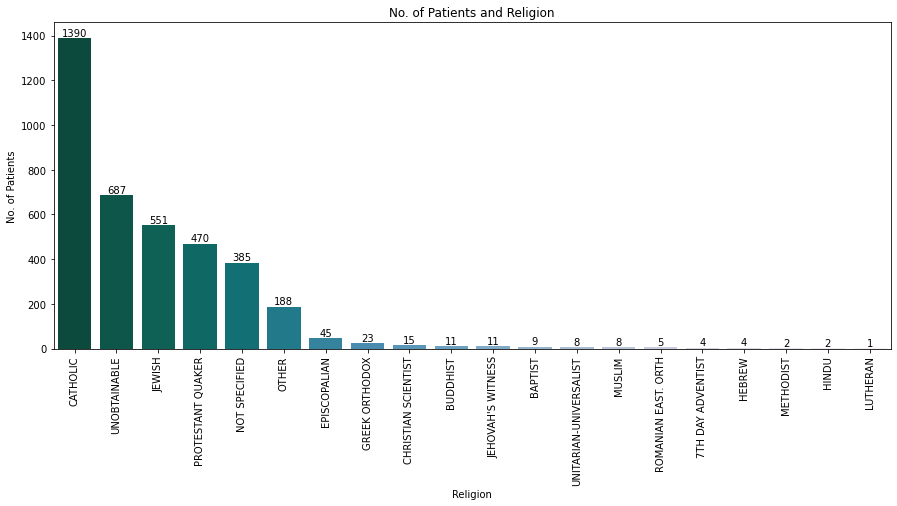

In [46]:
d = df.groupby("religion_descr")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Religion")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=90)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

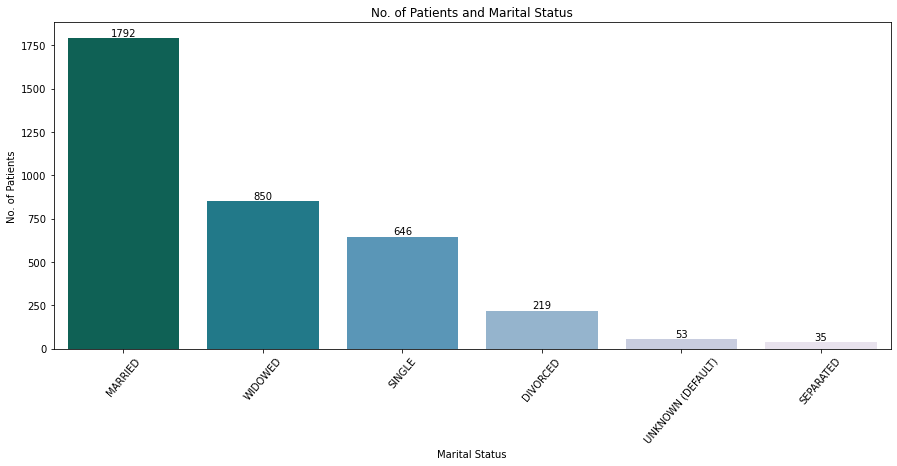

In [47]:
d = df.groupby("marital_status_descr")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Marital Status")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=50)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

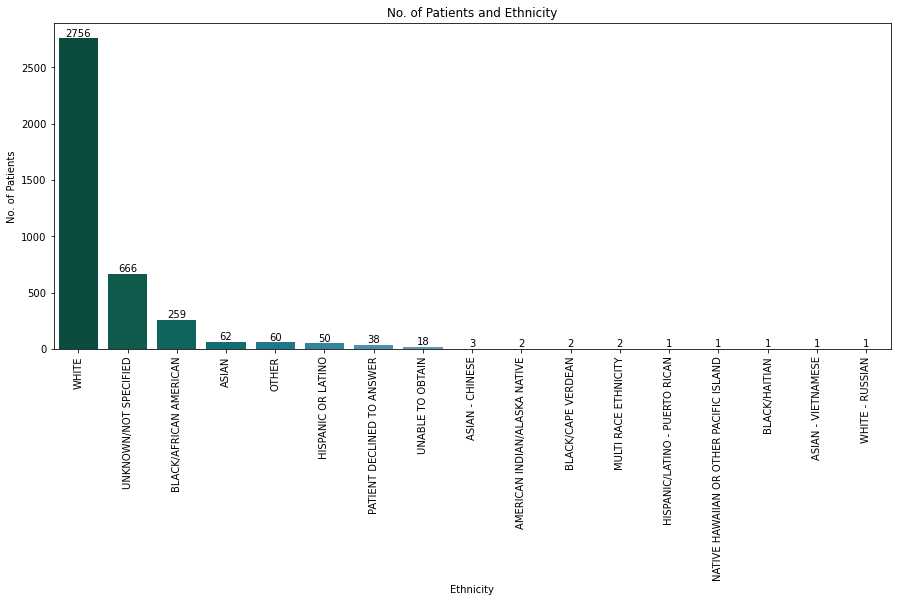

In [48]:
d = df.groupby("ethnicity_descr")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Ethnicity")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=90)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

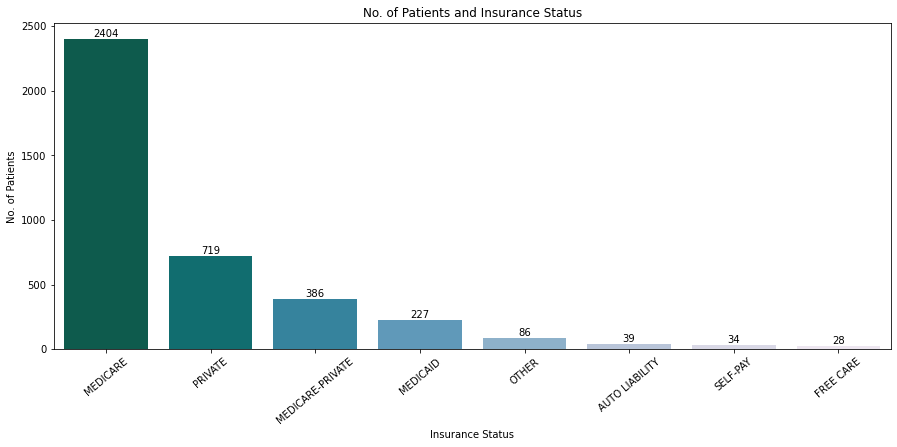

In [49]:
d = df.groupby("overall_payor_group_descr")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Insurance Status")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=40)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

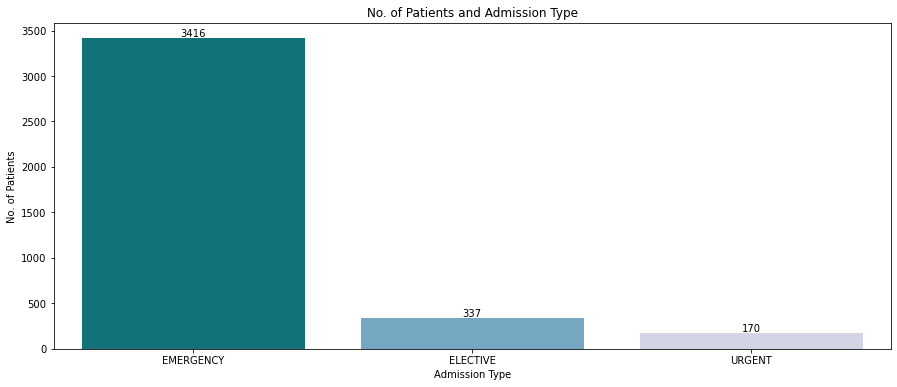

In [50]:
d = df.groupby("admission_type_descr")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Admission Type")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=0)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

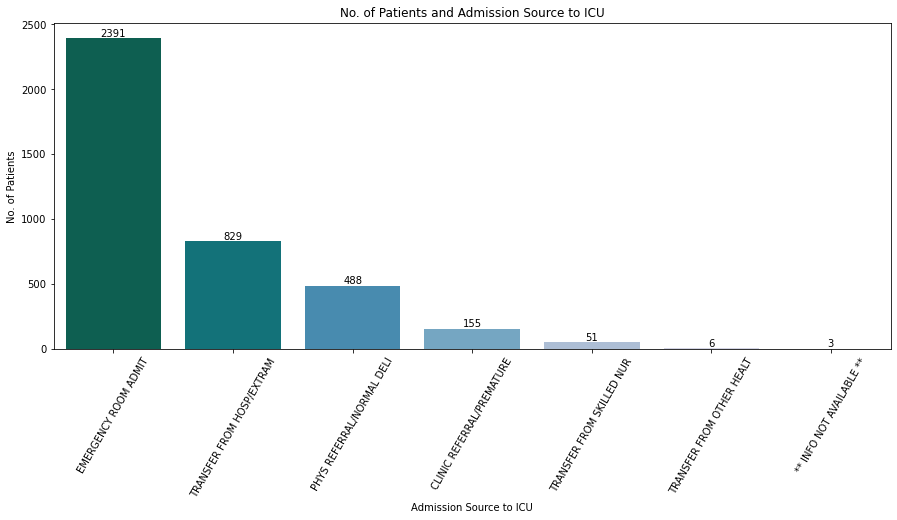

In [51]:
d = df.groupby("admission_source_descr")["hadm_id"].size().sort_values(ascending= False).to_frame()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data = d, y = d["hadm_id"], x= d.index, palette="PuBuGn_r")

ax.bar_label(ax.containers[0])

plt.xlabel(x:="Admission Source to ICU")
plt.ylabel(y:="No. of Patients")
plt.title(t:= y + " and " + x)

plt.xticks(rotation=60)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

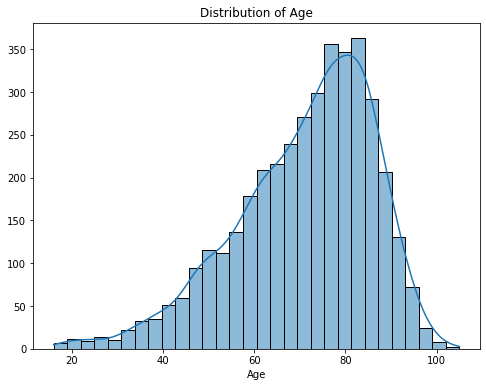

In [157]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data = df, x = "age_at_adm", bins = 30 ,palette="PuBuGn_r", kde = True)

plt.xlabel(x:="Age")
plt.ylabel(y:="")
plt.title(t:="Distribution of Age")
plt.xticks(rotation=0)
plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [167]:
print(df["age_at_adm"].mean())
print(df["age_at_adm"].median())

71.13790466479735
74.0


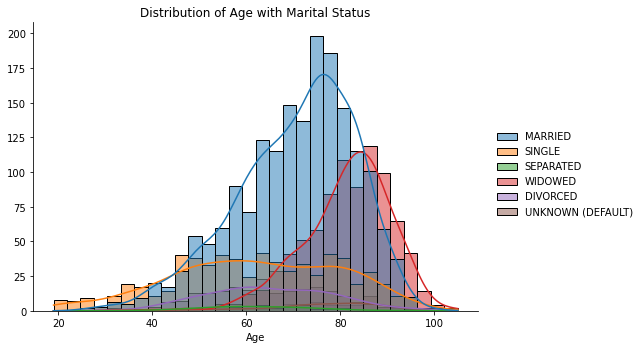

In [158]:
sns.displot(data = df, x = "age_at_adm", bins = 30 , hue = 'marital_status_descr',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")
plt.title(t:="Distribution of Age with Marital Status")

plt.xticks(rotation=0)

plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")
plt.show()

In [174]:
def mean_calc(col_name, unique):
    med = df[df[col_name]== unique]["age_at_adm"].median()
    
    return med

# Medain of each Types

In [191]:
d = {}

for i in df["marital_status_descr"].unique():
    a = mean_calc("marital_status_descr", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'SINGLE': 62.0,
 'SEPARATED': 62.0,
 'DIVORCED': 64.0,
 'MARRIED': 73.0,
 nan: nan,
 'UNKNOWN (DEFAULT)': 79.0,
 'WIDOWED': 83.0}

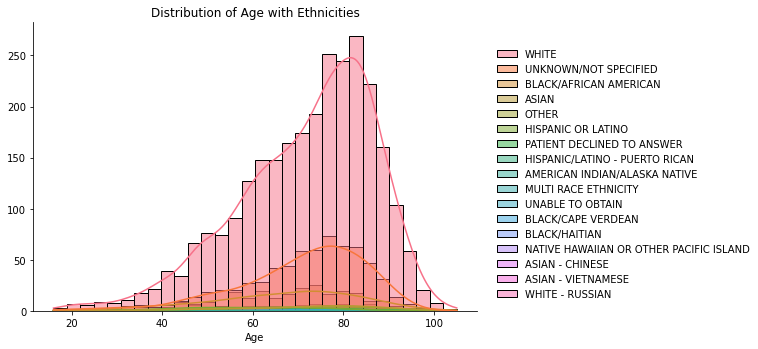

In [161]:
sns.displot(data = df, x = "age_at_adm", bins = 30 , hue = 'ethnicity_descr',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")

plt.title(t:="Distribution of Age with Ethnicities")
plt.xticks(rotation=0)

plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")

plt.show()

In [192]:
d = {}

for i in df["ethnicity_descr"].unique():
    a = mean_calc("ethnicity_descr", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'AMERICAN INDIAN/ALASKA NATIVE': 43.0,
 'MULTI RACE ETHNICITY': 52.0,
 'ASIAN - VIETNAMESE': 57.0,
 'HISPANIC OR LATINO': 61.0,
 'PATIENT DECLINED TO ANSWER': 66.5,
 'ASIAN - CHINESE': 69.0,
 'BLACK/CAPE VERDEAN': 69.5,
 'BLACK/AFRICAN AMERICAN': 70.0,
 'OTHER': 71.5,
 'HISPANIC/LATINO - PUERTO RICAN': 72.0,
 'UNKNOWN/NOT SPECIFIED': 74.0,
 'UNABLE TO OBTAIN': 74.0,
 'WHITE': 75.0,
 'ASIAN': 75.0,
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND': 75.0,
 'BLACK/HAITIAN': 80.0,
 'WHITE - RUSSIAN': 83.0}

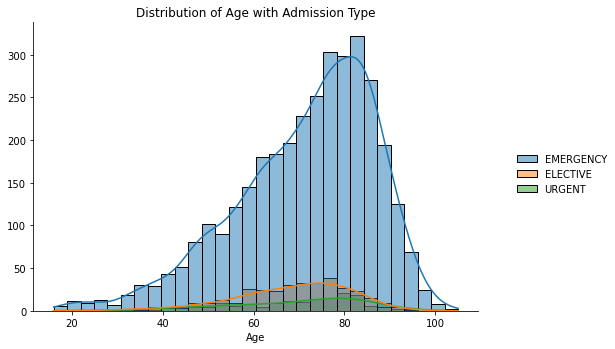

In [163]:
sns.displot(data = df, x = "age_at_adm", bins = 30 , hue = 'admission_type_descr',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")

plt.title(t:="Distribution of Age with Admission Type")
plt.xticks(rotation=0)

plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")

plt.show()

In [193]:
d = {}

for i in df["admission_type_descr"].unique():
    a = mean_calc("admission_type_descr", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'ELECTIVE': 70.0, 'URGENT': 73.0, 'EMERGENCY': 74.0}

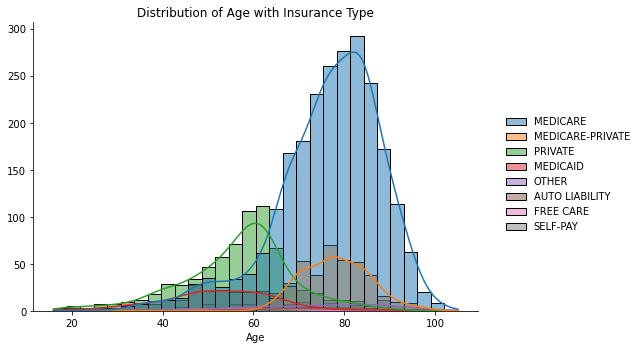

In [165]:
sns.displot(data = df, x = "age_at_adm", bins = 30 , hue = 'overall_payor_group_descr',
            kde = True, height =4.75, aspect = 1.5).legend.set_title(None)

plt.xlabel(x:="Age")
plt.ylabel(y:="")

plt.title(t:="Distribution of Age with Insurance Type")
plt.xticks(rotation=0)

plt.savefig(f"EDA_{t}.jpeg", bbox_inches = "tight")

plt.show()

In [194]:
d = {}
for i in df["overall_payor_group_descr"].unique():
    a = mean_calc("overall_payor_group_descr", i)
    d[i] = a
dict(sorted(d.items(), key=lambda item: item[1]))

{'SELF-PAY': 52.0,
 'MEDICAID': 53.0,
 'FREE CARE': 57.5,
 'PRIVATE': 58.0,
 'AUTO LIABILITY': 68.0,
 'MEDICARE': 78.0,
 'MEDICARE-PRIVATE': 78.0,
 'OTHER': 78.0}